In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# for ReLU, fit 방식 : 0 to 1, 1 to 0
df_d1d5_LSH = pd.read_csv('/project/LSH/df_d1d5_best.csv')
df_d6d10_LSH = pd.read_csv('/project/LSH/df_d6d10_best.csv')

# for Sign, fit 방식 : all 1 (all 0보다 더 큰 변화 볼 수 있기 때문. 0이 개수가 더 많아서 0을 1로 바꾸는게 더 변화가 큼.)
df_d1d5_KGY = pd.read_csv('df_d1d5_best_for_meth2.csv')
df_d6d10_KGY = pd.read_csv('df_d6d10_best_for_meth2.csv')

In [7]:
# ReLU
for i, j in enumerate(df_d1d5_LSH['diff']):
    if j <= 0:
        df_d1d5_LSH['diff'][i] = 0
df_d1d5_LSH = df_d1d5_LSH[['feature', 'diff']]
df_d1d5_LSH.sort_values(by = 'feature', inplace = True)
df_d1d5_LSH.reset_index(inplace = True)
df_d1d5_LSH = df_d1d5_LSH.drop('index', axis = 1)
df_d1d5_LSH


for i, j in enumerate(df_d6d10_LSH['diff']):
    if j <= 0:
        df_d6d10_LSH['diff'][i] = 0
df_d6d10_LSH = df_d6d10_LSH[['feature', 'diff']]
df_d6d10_LSH.sort_values(by = 'feature', inplace = True)
df_d6d10_LSH.reset_index(inplace = True)
df_d6d10_LSH = df_d6d10_LSH.drop('index', axis = 1)
df_d6d10_LSH

<ipython-input-7-eb699b7c390c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d1d5_LSH['diff'][i] = 0


,feature,diff
0,0,0.000000
1,50803,0.000739
2,50804,0.003245
3,50805,0.000276
4,50806,0.004817
...,...,...
4063,78112001103,0.000263
4064,79511050204,0.000000
4065,87701071218,0.009628
4066,87701083336,0.000000


<ipython-input-7-eb699b7c390c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d6d10_LSH['diff'][i] = 0


,feature,diff
0,0,0.000000
1,50803,0.000890
2,50804,0.000546
3,50805,0.000613
4,50806,0.000000
...,...,...
4063,78112001103,0.000454
4064,79511050204,0.000011
4065,87701071218,0.000000
4066,87701083336,0.000000


In [8]:
# Sign
df_d1d5_KGY = df_d1d5_KGY[['feature', 'diff_preds']]
df_d1d5_KGY = df_d1d5_KGY.sort_values(by = 'feature')
df_d1d5_KGY.reset_index(inplace = True)
df_d1d5_KGY = df_d1d5_KGY.drop('index', axis = 1)
# df_d1d5_KGY

for i, j in enumerate(df_d1d5_KGY['diff_preds']):
    if j>0:
        df_d1d5_KGY['diff_preds'][i] = 1
    elif j<0:
        df_d1d5_KGY['diff_preds'][i] = -1
df_d1d5_KGY


df_d6d10_KGY = df_d6d10_KGY[['feature', 'diff_preds']]
df_d6d10_KGY = df_d6d10_KGY.sort_values(by = 'feature')
df_d6d10_KGY.reset_index(inplace = True)
df_d6d10_KGY = df_d6d10_KGY.drop('index', axis = 1)
# df_d6d10_KGY

for i, j in enumerate(df_d6d10_KGY['diff_preds']):
    if j>0:
        df_d6d10_KGY['diff_preds'][i] = 1
    elif j<0:
        df_d6d10_KGY['diff_preds'][i] = -1
df_d6d10_KGY

,feature,diff_preds
0,0,-0.012654
1,50803,-0.014817
2,50804,0.035179
3,50805,-0.026609
4,50806,0.042674
...,...,...
4063,78112001103,-0.041464
4064,79511050204,-0.001754
4065,87701071218,0.067927
4066,87701083336,0.004660


<ipython-input-8-21aa8a391fee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d1d5_KGY['diff_preds'][i] = -1
<ipython-input-8-21aa8a391fee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d1d5_KGY['diff_preds'][i] = 1


,feature,diff_preds
0,0,-1.0
1,50803,-1.0
2,50804,1.0
3,50805,-1.0
4,50806,1.0
...,...,...
4063,78112001103,-1.0
4064,79511050204,-1.0
4065,87701071218,1.0
4066,87701083336,1.0


,feature,diff_preds
0,0,-0.007067
1,50803,-0.011134
2,50804,-0.002717
3,50805,-0.007125
4,50806,0.006066
...,...,...
4063,78112001103,-0.008157
4064,79511050204,-0.000397
4065,87701071218,0.022792
4066,87701083336,0.002607


<ipython-input-8-21aa8a391fee>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d6d10_KGY['diff_preds'][i] = -1
<ipython-input-8-21aa8a391fee>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d6d10_KGY['diff_preds'][i] = 1


,feature,diff_preds
0,0,-1.0
1,50803,-1.0
2,50804,-1.0
3,50805,-1.0
4,50806,1.0
...,...,...
4063,78112001103,-1.0
4064,79511050204,-1.0
4065,87701071218,1.0
4066,87701083336,1.0


In [9]:
# Method2_근시간, 나머지 df 같은 조건으로 sorting 된 상태
Method2_근시간 = df_d1d5_LSH.copy()
Method2_근시간['diff_preds'] = df_d1d5_KGY['diff_preds']
Method2_근시간['Method2_근시간'] = df_d1d5_LSH['diff'] * df_d1d5_KGY['diff_preds']
Method2_근시간 = Method2_근시간.sort_values('Method2_근시간', ascending = False)
Method2_근시간

,feature,diff,diff_preds,Method2_근시간
2195,409606211,0.044651,1.0,0.044651
1276,74606211,0.028581,1.0,0.028581
1081,67434504,0.024894,1.0,0.024894
982,54817525,0.022155,1.0,0.022155
2744,10019055302,0.021081,1.0,0.021081
...,...,...,...,...
1815,182138167,0.008059,-1.0,-0.008059
3818,63323016101,0.008225,-1.0,-0.008225
37,50889,0.008520,-1.0,-0.008520
469,4003822,0.009620,-1.0,-0.009620


In [10]:
# Method2_원시간, 나머지 df 같은 조건으로 sorting 된 상태
Method2_원시간 = df_d6d10_LSH.copy()
Method2_원시간['diff_preds'] = df_d6d10_KGY['diff_preds']
Method2_원시간['Method2_원시간'] = df_d6d10_LSH['diff'] * df_d6d10_KGY['diff_preds']
Method2_원시간 = Method2_원시간.sort_values('Method2_원시간', ascending = False)
Method2_원시간

,feature,diff,diff_preds,Method2_원시간
3723,61553015311,0.000481,1.0,0.000481
217,51301,0.000320,1.0,0.000320
933,54008826,0.000309,1.0,0.000309
2291,487980125,0.000296,1.0,0.000296
193,51256,0.000287,1.0,0.000287
...,...,...,...,...
2312,517293025,0.001881,-1.0,-0.001881
1815,182138167,0.001932,-1.0,-0.001932
162,51200,0.001937,-1.0,-0.001937
37,50889,0.001982,-1.0,-0.001982


In [11]:
Method2_근시간 = Method2_근시간.sort_values(by = 'feature')
Method2_원시간 = Method2_원시간.sort_values(by = 'feature')

In [12]:
Method2 = Method2_근시간[['feature']]
Method2

,feature
0,0
1,50803
2,50804
3,50805
4,50806
...,...
4063,78112001103
4064,79511050204
4065,87701071218
4066,87701083336


In [13]:
Method2['Method2'] = Method2_원시간['Method2_원시간'] * Method2_근시간['Method2_근시간']

<ipython-input-13-ee391f47e5ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Method2['Method2'] = Method2_원시간['Method2_원시간'] * Method2_근시간['Method2_근시간']


In [17]:
Method2 = Method2.sort_values('Method2', ascending = True)
Method2

,feature,Method2
364,225792,-0.000002
11,50820,-0.000002
362,225752,-0.000002
2,50804,-0.000002
3415,54569523500,-0.000001
...,...,...
162,51200,0.000015
1815,182138167,0.000016
37,50889,0.000017
469,4003822,0.000018


In [18]:
# Method2.to_csv('Method2_원시간*근시간.csv', index = False)

In [20]:
Method2 = pd.read_csv('Method2_원시간*근시간.csv')

In [27]:
Method2

,feature,Method2
0,225792,-0.000002
1,50820,-0.000002
2,225752,-0.000002
3,50804,-0.000002
4,54569523500,-0.000001
...,...,...
4063,51200,0.000015
4064,182138167,0.000016
4065,50889,0.000017
4066,4003822,0.000018


In [16]:
pd.read_csv('/project/LSH/method2_df_원시간*근시간.csv')

,feature,mul,원시간*근시간
0,225792,0.002602,-0.000002
1,50820,0.002307,-0.000002
2,225752,0.003063,-0.000002
3,50804,0.003245,-0.000002
4,54569523500,0.001800,-0.000001
...,...,...,...
4063,51200,-0.007664,0.000015
4064,182138167,-0.008059,0.000016
4065,50889,-0.008520,0.000017
4066,4003822,-0.009620,0.000018


# graph
```
- 부분이 역전성이 강하므로 그 쪽만 보면 됨. 그래서 csv 파일도 -가 먼저 정렬되게끔 정렬시킨 것.
```
## graph library
## absum 함수

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [22]:
total_data = pd.read_csv('/project/LSH/total_data_7727.csv')
x = np.load('/project/LSH/x_(7727,10,4068).npy')

def absum(PPL_list,top_or_down):
    # 1) PRE_top10의 index 구하기
    PPL_top10 = top_or_down
    item_list = total_data['ITEMID'].sort_values().unique()

    PPL_index = []
    for i in PPL_top10:
        a = list(item_list).index(i)
        PPL_index.append(a)
    
    # 2) 생존자 index 구하기 
    sub7727 = total_data['SUBJECT_ID'].unique()

    patient = pd.read_csv('/project/LSH/폐렴환자.csv')
    patient = patient.sort_values(by='SUBJECT_ID')
    patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
    sub_1_list = patient[patient['EXPIRE_FLAG']==0]['SUBJECT_ID'].values

    생존자_index = []
    for i in sub_1_list:
        생존자_index.append(list(sub7727).index(i))
        
    # 3) 생존자 3009명의 D-10 ~ D-1 feature별 abnormal sum 
    x_생존자 = x[생존자_index,:,:]

    result1 = []
    for i in PPL_index:
        for j in range(10):
            result1.append(x_생존자[:,j,i].sum())

    result1 = np.array(result1)
    result1 = result1.reshape(10,-1)
    df_PPL = pd.DataFrame(result1)
    df_PPL.columns = [f'D-{i}' for i in range(10,0,-1)]
    df_PPL.index = PPL_top10

    # 생존한 3009명에 대한 비율 계산
    for i in PPL_top10:
        df_PPL.loc[f'{i}_생존'] = df_PPL.loc[i].iloc[:]/x_생존자.shape[0]
        
    # 4) 사망자 4718명의 D-10 ~ D-1 feature별 abnormal sum 
    사망자_index = list(set(range(0,7727))-set(생존자_index))

    x_사망자 = x[사망자_index,:,:]

    result2 = []
    for i in PPL_index:
        for j in range(10):
            result2.append(x_사망자[:,j,i].sum())

    result2 = np.array(result2)
    result2 = result2.reshape(10,-1)
    df_PPL_사망자 = pd.DataFrame(result2)
    df_PPL_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
    df_PPL_사망자.index = PPL_top10

    # 사망한 4718명에 대한 비율 계산
    for i in PPL_top10:
        df_PPL_사망자.loc[f'{i}_사망'] = df_PPL_사망자.loc[i]/x_사망자.shape[0] 
        
    # 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

    df_PPL_trans = df_PPL.transpose()
    df_PPL_사망자_trans = df_PPL_사망자.transpose()

    _ = plt.figure(figsize = (13,12),dpi=150)
    for i, f in enumerate(PPL_top10): 
        _ = plt.subplot(4,3,1+i)
        _ = plt.title(f)
        _ = ax = sns.lineplot(data = df_PPL_사망자_trans, x = df_PPL_사망자_trans.index, y = f'{f}_사망')
        _ = ax = sns.lineplot(data = df_PPL_trans, x = df_PPL_trans.index, y = f'{f}_생존')
        _ = ax.legend(labels = ['사망', '생존'], loc = 'upper left', fontsize=12)
        _ = ax.set_ylabel('per', fontsize = 12)

    plt.tight_layout()

In [28]:
method2 = pd.read_csv('Method2_원시간*근시간.csv')
method2 = method2.sort_values(by='Method2',ascending=True) # - 부분이 역전성이 강하므로 그 쪽만 보면 됨. 그래서 csv 파일도 -가 먼저 정렬되게끔 정렬시킨 것.
########################################################################################################
m2_feature = method2['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in m2_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

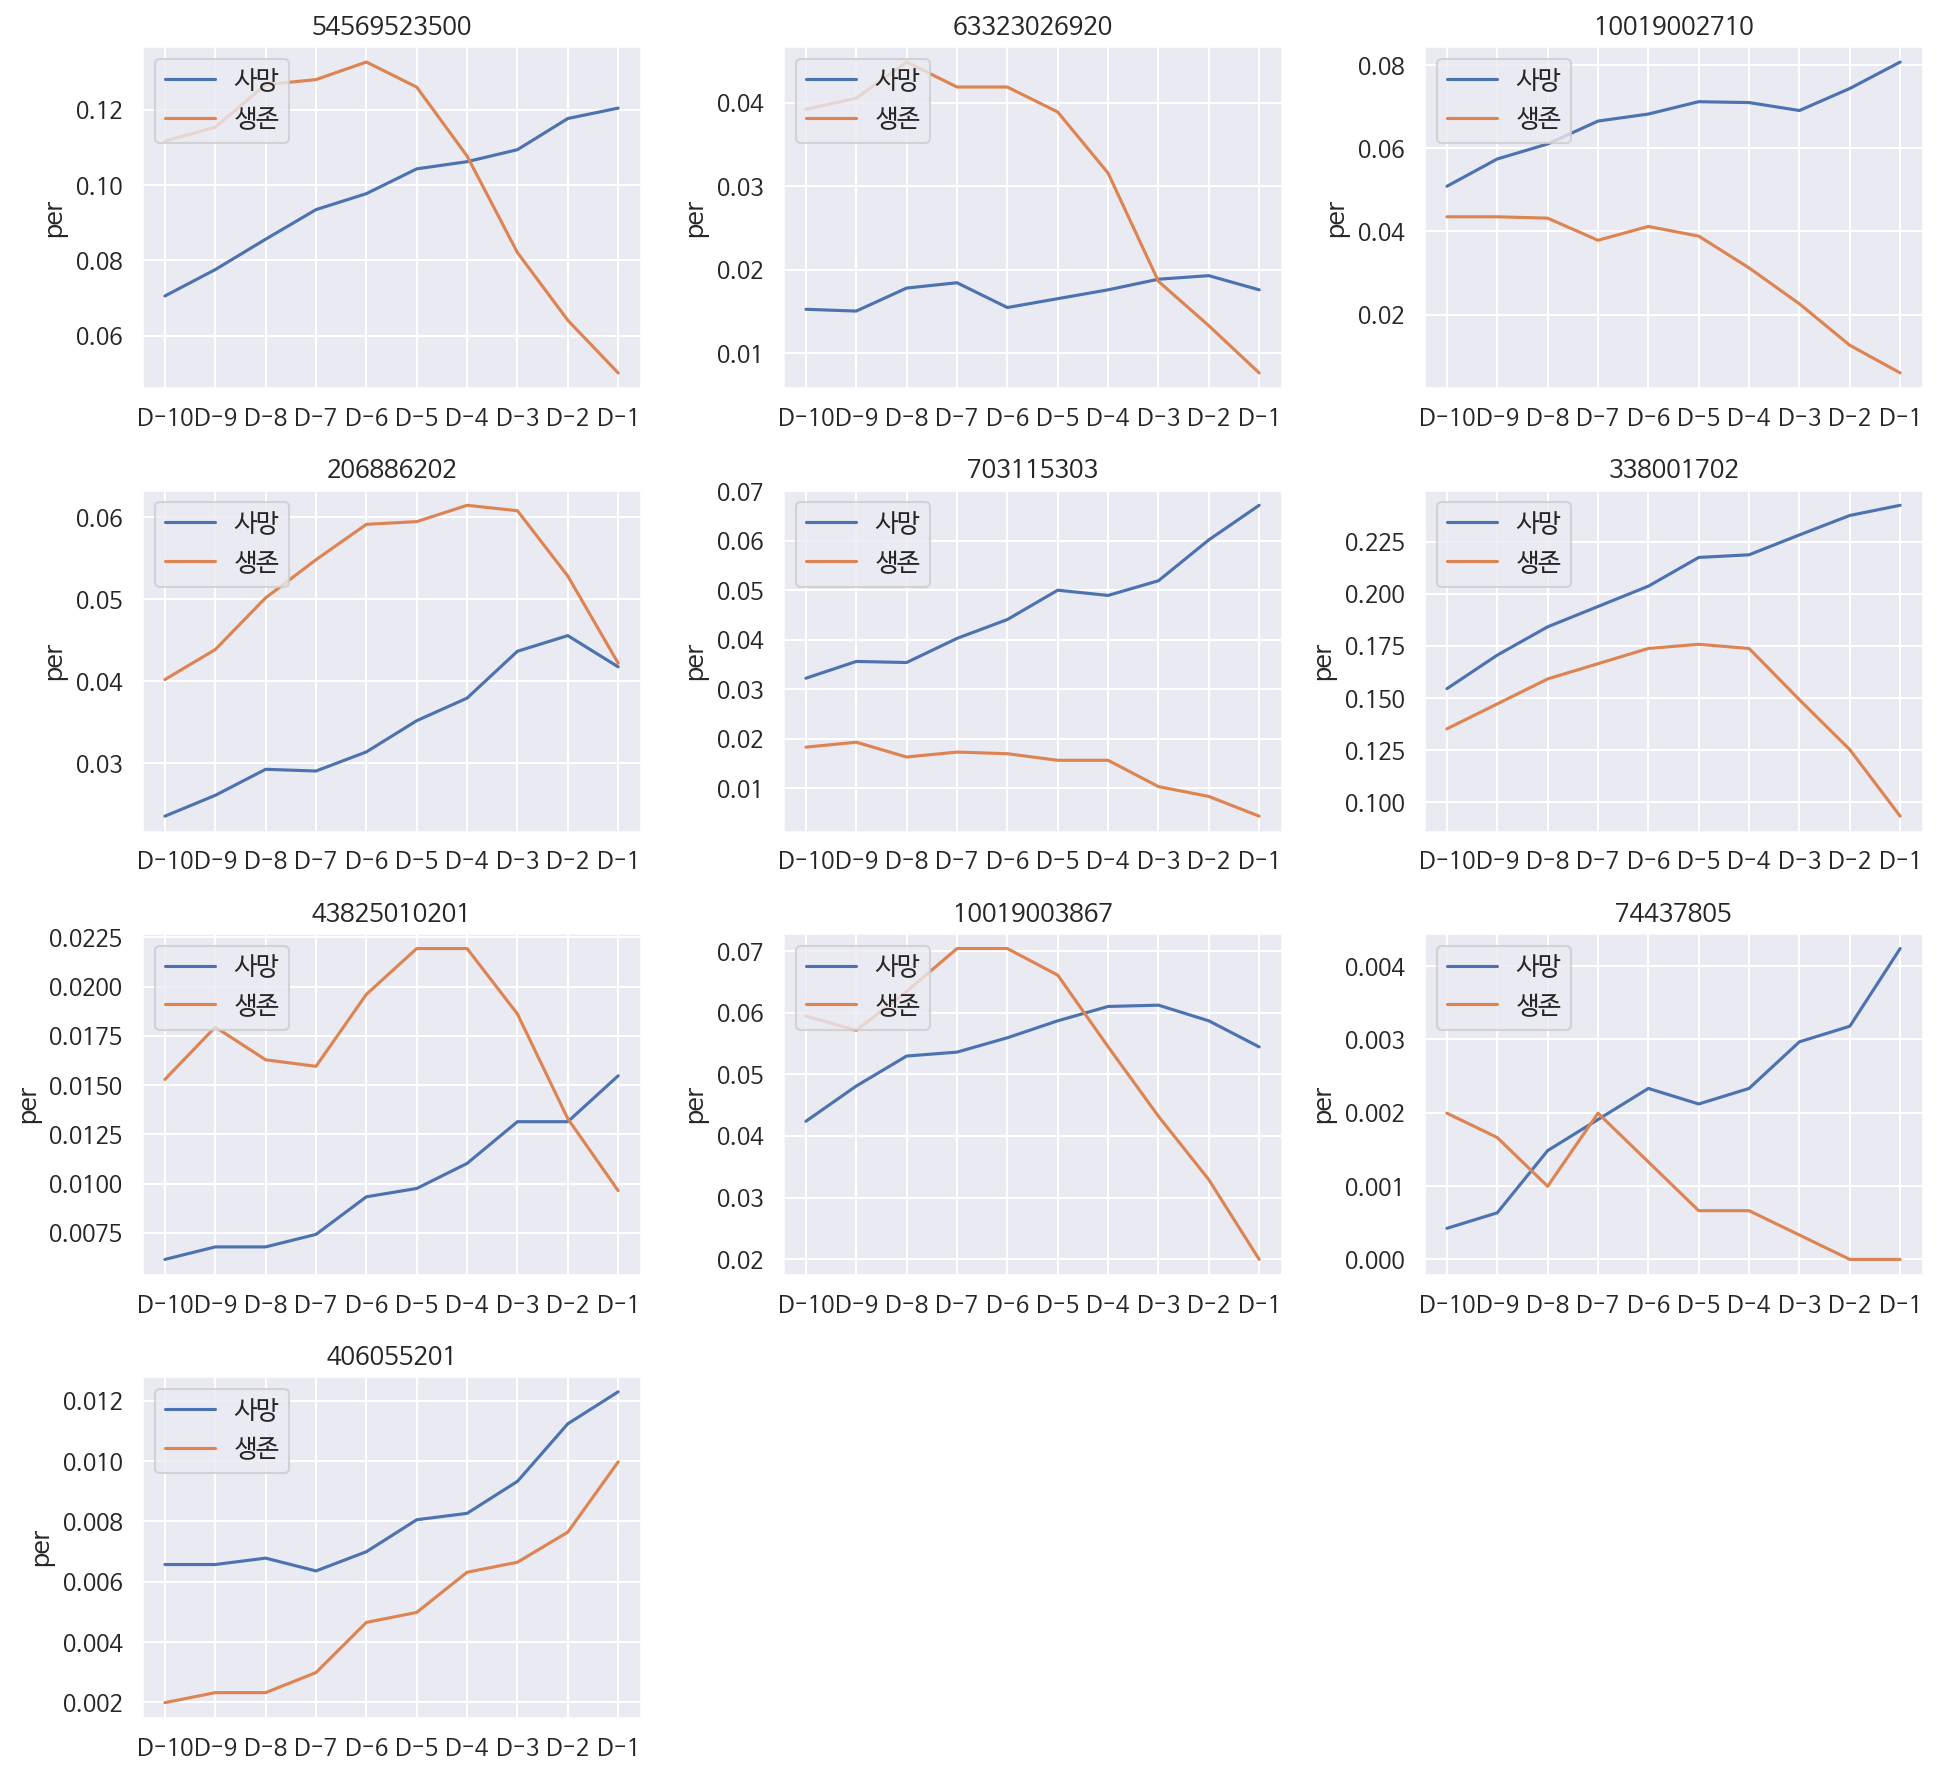

In [29]:
absum(PRE_list,PRE_list[:10])

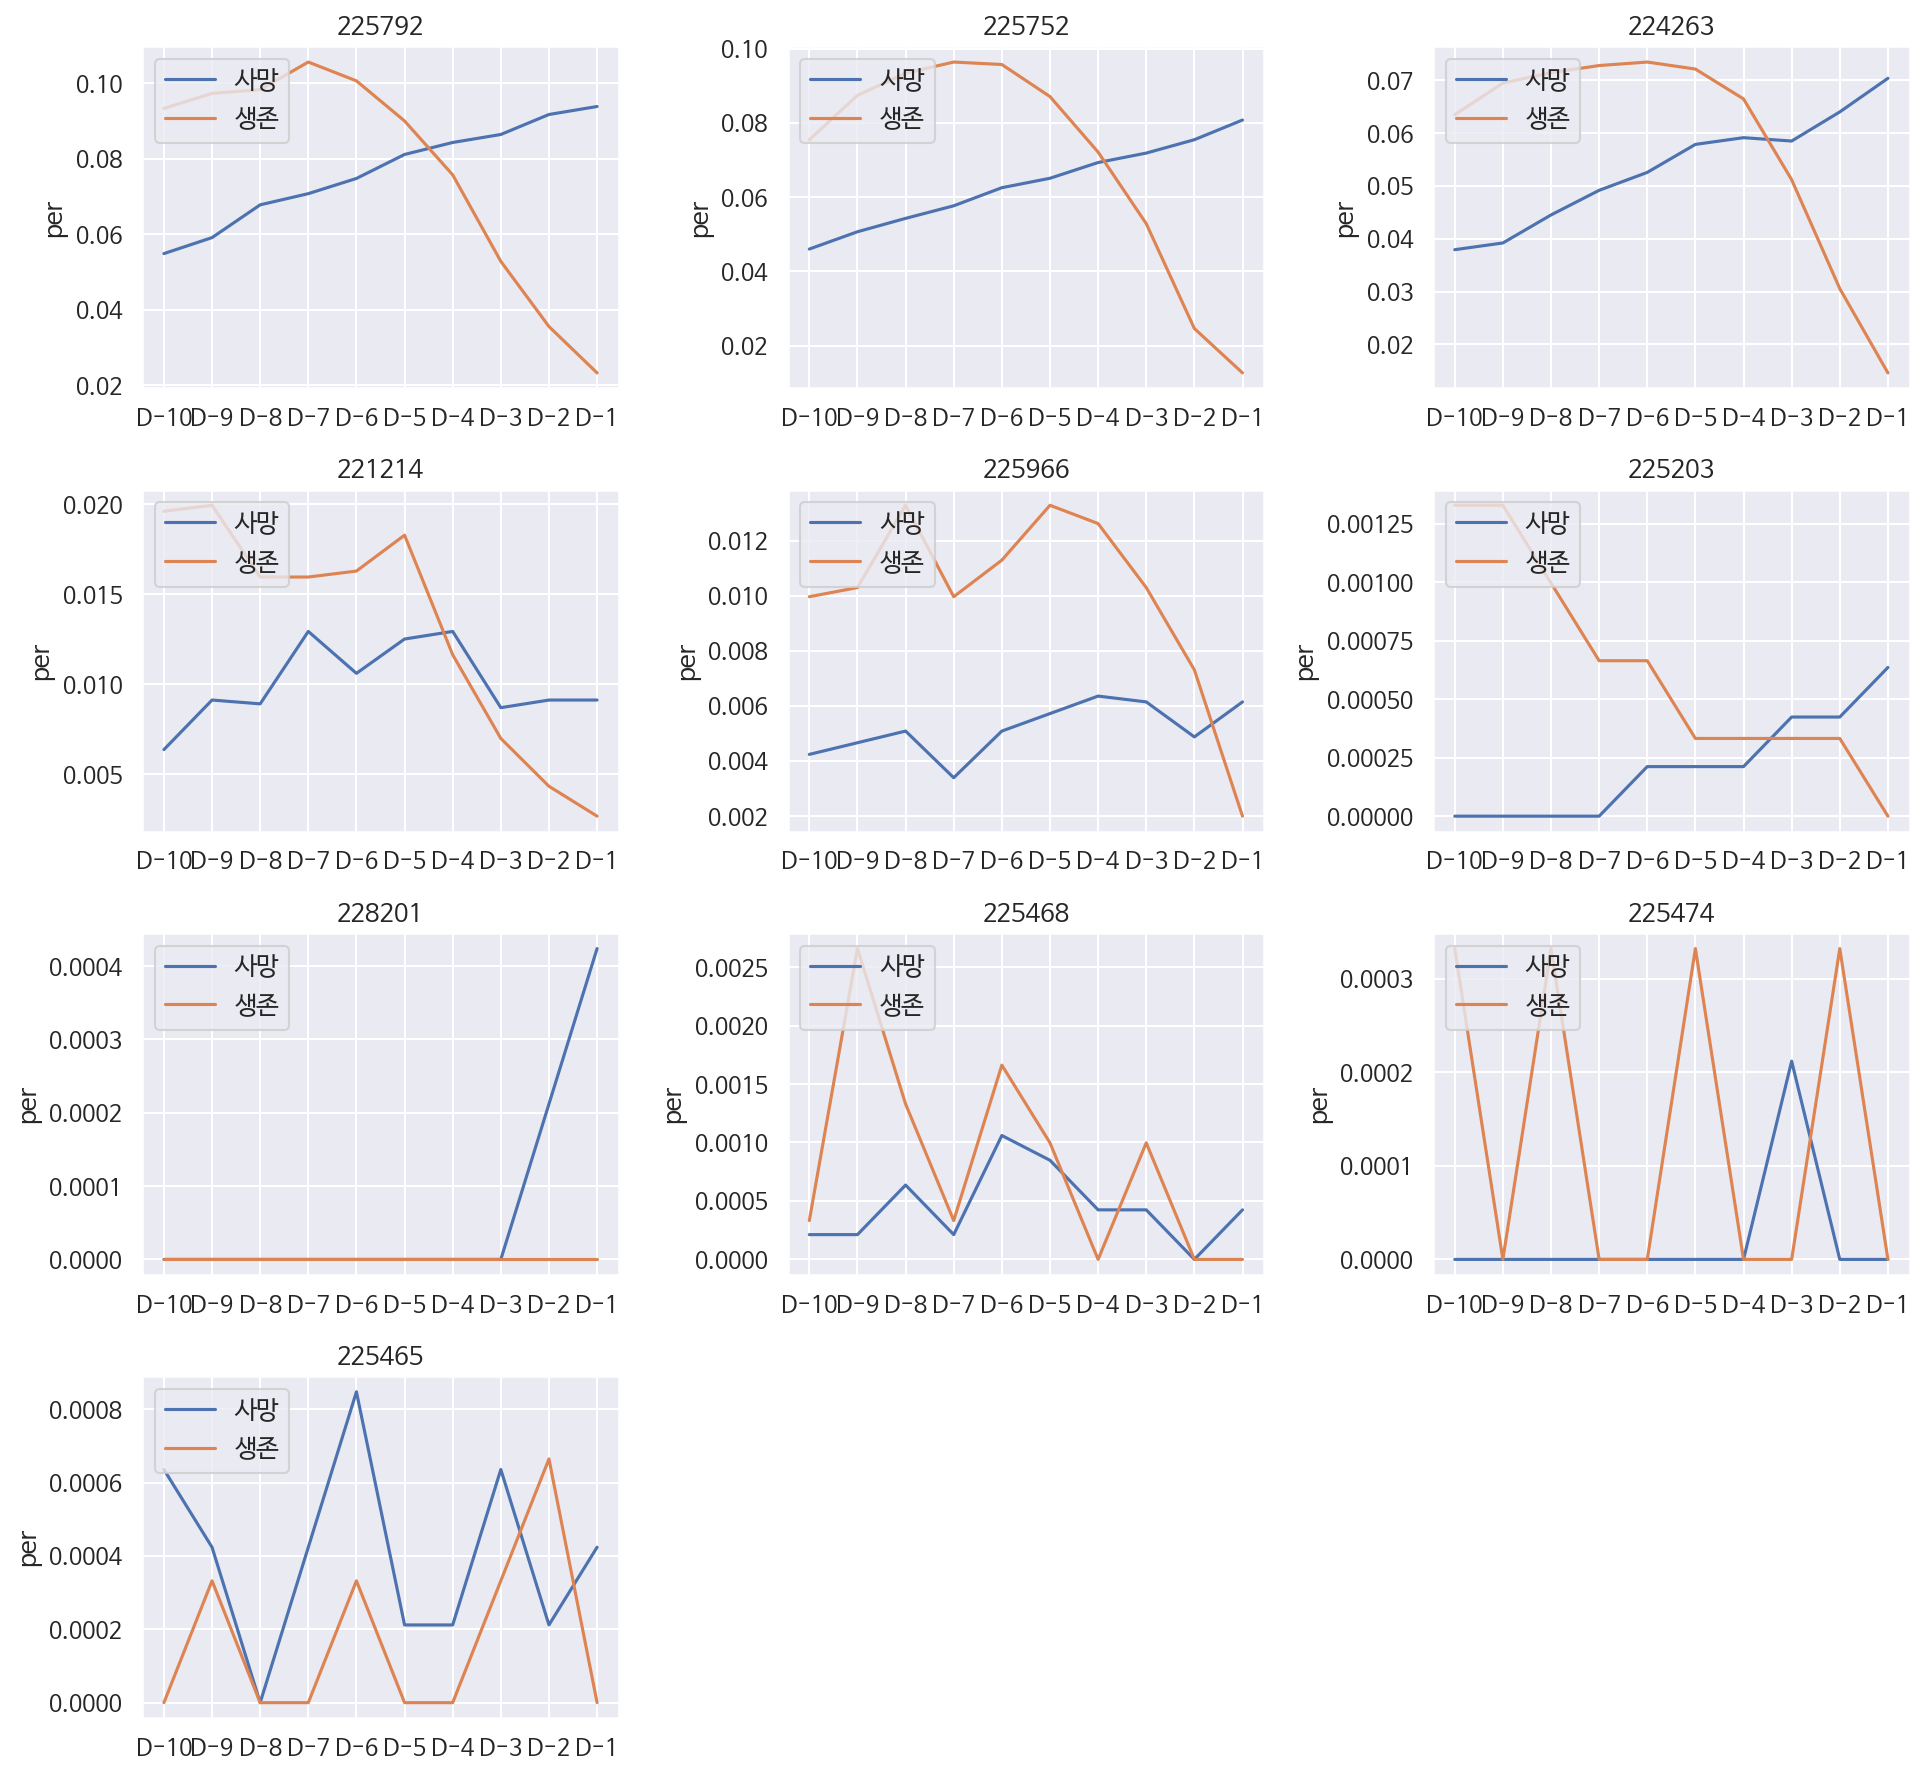

In [30]:
absum(PRO_list,PRO_list[:10])

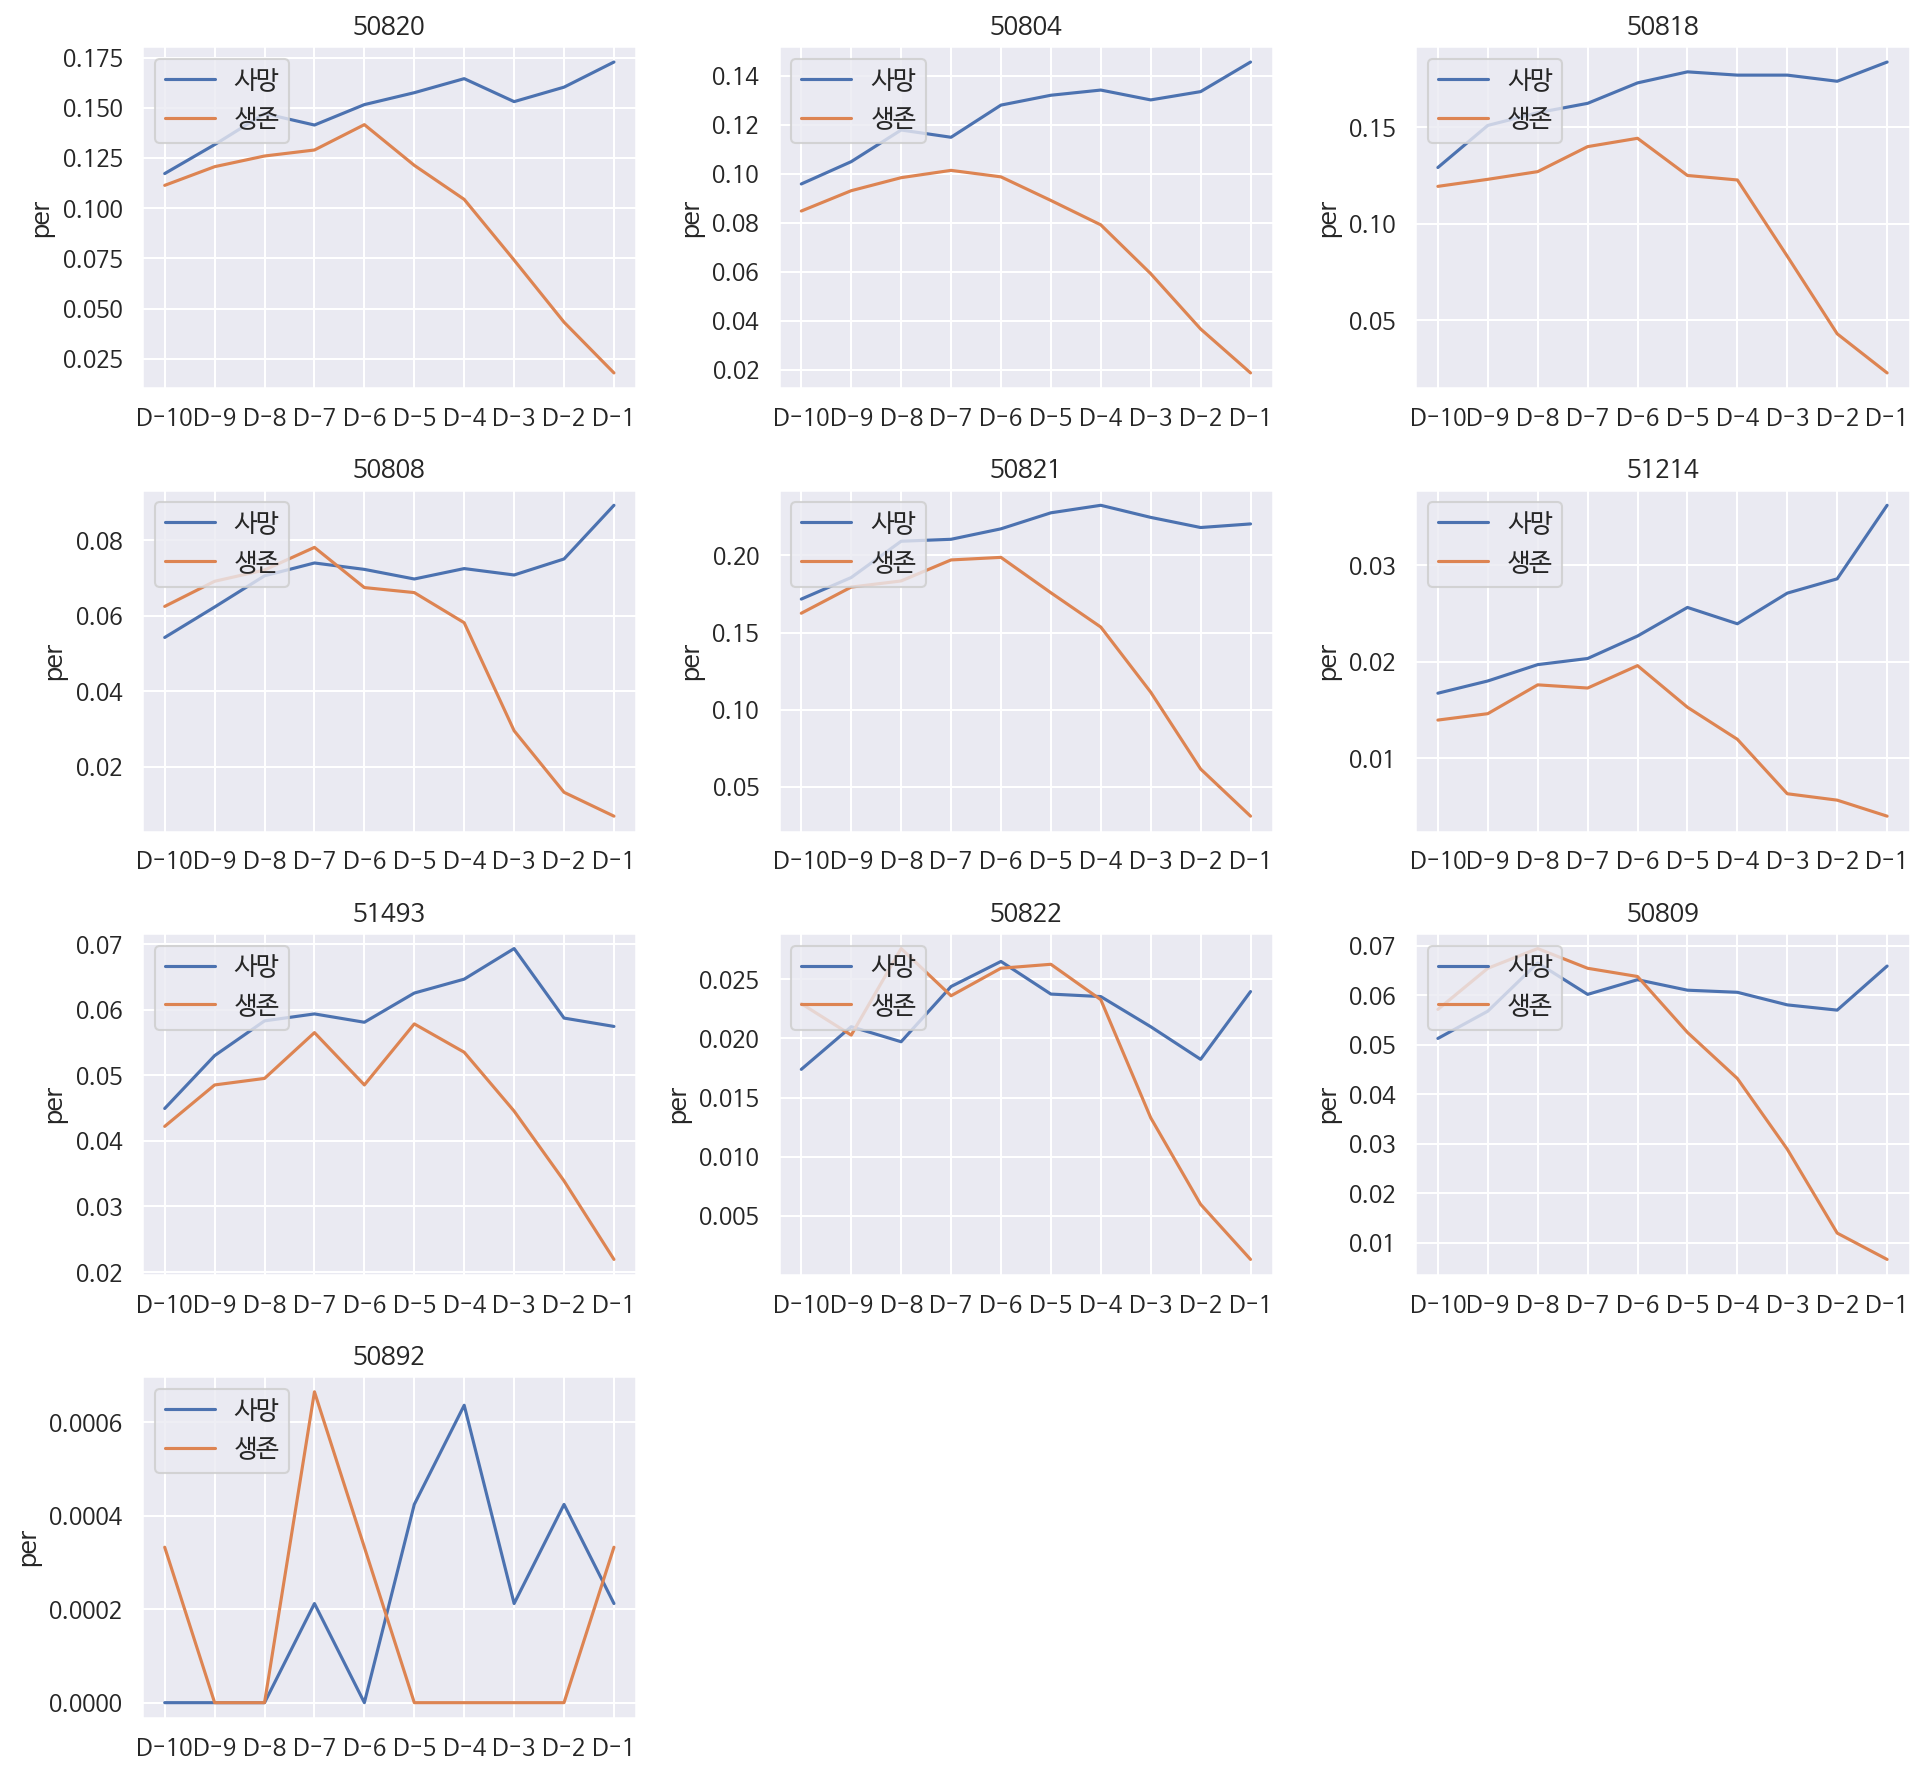

In [31]:
absum(LAB_list,LAB_list[:10])